In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit 
from matplotlib import pyplot as plt 
from scipy.integrate import quad

In [2]:
df=pd.read_csv('data_yo_nooutlier.csv')
# dfb=pd.read_csv('beta_t.csv')
df

,Unnamed: 0,y1,y2,y3,y4,y5,y6,y7,y8,y9,o1,o2,o3,o4,o5,o6,o7,o8
0,0,1.0000,1.0000,1.0000,1.0000,1.0000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000000,1.000000,1.000000
1,1,0.3631,0.2311,0.2667,0.2788,0.3855,0.450000,0.493615,0.389984,0.633600,0.1855,0.2448,0.1392,0.1630,0.2968,0.307648,0.382222,0.290369
2,2,0.2447,0.1268,0.1754,0.1620,0.2371,0.218815,0.264784,0.177475,0.267840,0.0936,0.1330,0.1338,0.0980,0.1691,0.152615,0.113508,0.137143
3,3,0.1442,0.0980,0.1467,0.0960,0.2133,0.155553,0.160528,0.114820,0.190246,0.0506,0.1045,0.1280,0.0507,0.1615,0.072195,0.049266,0.058597
4,4,0.1148,0.0699,0.1232,0.0667,0.1487,0.101483,0.125972,0.087065,0.163610,0.0356,0.0849,0.0727,0.0323,0.1283,0.047408,0.031782,0.036364


In [3]:
for i in range(1,10):
    exec('y'+str(i)+'=np.asarray(df.y'+str(i)+')')
    exec('print(y'+str(i)+')')
for i in range(1,9):
    exec('o'+str(i)+'=np.asarray(df.o'+str(i)+')')

[1.     0.3631 0.2447 0.1442 0.1148]
[1.     0.2311 0.1268 0.098  0.0699]
[1.     0.2667 0.1754 0.1467 0.1232]
[1.     0.2788 0.162  0.096  0.0667]
[1.     0.3855 0.2371 0.2133 0.1487]
[1.         0.45       0.21881491 0.15555254 0.10148339]
[1.         0.49361481 0.26478381 0.16052826 0.12597215]
[1.         0.38998442 0.17747532 0.11481974 0.08706493]
[1.        0.6336    0.26784   0.1902464 0.1636096]


In [4]:
data=df.drop(df.columns[[0,9]],axis=1)
arr=data.values

In [5]:
from scipy import stats
for i in range(0, len(arr)):
    print ("t", str(i+1),  stats.ttest_rel(arr[i][:8],arr[i][8:]))

t 1 Ttest_relResult(statistic=nan, pvalue=nan)
t 2 Ttest_relResult(statistic=5.392392522152064, pvalue=0.001016747360506949)
t 3 Ttest_relResult(statistic=3.7471615375393283, pvalue=0.007194872253743784)
t 4 Ttest_relResult(statistic=4.114410716675561, pvalue=0.004490963516687081)
t 5 Ttest_relResult(statistic=3.8432128406882615, pvalue=0.0063480364892861225)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans

In [9]:
X_train = np.array([y1,y2,y3,y4,y5,y6,y7,y8,o1,o2,o3,o4,o5,o6,o7,o8])

seed = 1
# model = TimeSeriesKMeans(n_clusters=2, metric="dtw",
#                          max_iter=10, random_state=seed)
model = TimeSeriesKMeans(n_clusters=2, verbose=True, random_state=seed)
# model_euc = TimeSeriesKMeans(n_clusters=2, verbose=True, random_state=seed)

ts_c = model.fit_predict(X_train)
ts_c

0.010 --> 0.007 --> 0.007 --> 


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

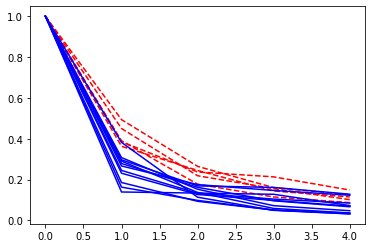

In [10]:
x_plt = X_train[ts_c == 0]
x_plt_ = X_train[ts_c == 1]
for xx in x_plt:
    plt.plot(xx,'--r')
for xx in x_plt_:
    plt.plot(xx,'-b')

In [11]:
# beta as constant
def test(x, b):
    return np.exp(b * x) 

In [12]:
#beta is evolve over time
def test_hyper(x, b0, b1):
    n=(-(b0*x+(b1/2)*x*x))
    return n       

In [13]:
def ans_hyper(x,b0,b1):
    b=-(b0*x+(b1/2)*x*x)
    b_=-(b0*(x-0.01)+(b1/2)*(x-0.01)*(x-0.01))
    f=b*(np.sign(b_-b)+1)*0.5+np.min(b)*(-(np.sign(b_-b)-1)*0.5)
    return np.exp(f)

 

In [14]:
def func(x, b0, b1):
    b=np.log(1+np.exp(b0+b1*x))
    #return 0.165*b
    return b



In [16]:
x = [3,8.5,13.5,18.5]
x1 = [0,6,11,16,21]  
X = np.linspace(0, 25, num = 40) 
X2 = np.linspace(0, 500, num = 40) 

[ 0.17337203 -0.00671707]
[ 0.2591885  -0.01299005]
[ 0.23248912 -0.01298788]
[ 0.21959422 -0.00878893]
[ 0.16880951 -0.00776554]
[ 0.15536607 -0.00447656]
[ 0.14138278 -0.0039068 ]
[ 0.1909138  -0.00704226]
[ 0.12718677 -0.00359927]
[ 0.29552679 -0.0132087 ]
[ 0.25840412 -0.01370273]
[ 0.28663449 -0.01649061]
[ 0.2963605  -0.01299805]
[ 0.22504789 -0.01248789]
[ 0.20989942 -0.0060951 ]
[ 0.21286256 -0.0042251 ]
[ 0.21842036 -0.00567182]


(-0.9, 23.0)

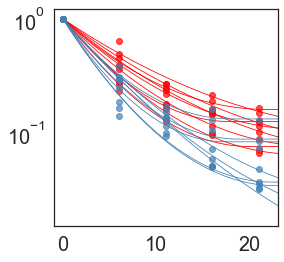

In [17]:
plt.figure(figsize=(4,4))
sns.set(font_scale=1.8) 
sns.set_style("white")

for i in range(1,10): # doing for y1~y3    
    exec( 'param_'+str(i)+',cov_'+str(i)+' = curve_fit(test_hyper, x1, np.log(y'+str(i)+'))' )
    exec( 'print (param_'+str(i)+')')
    exec( 'ans_hyper'+str(i)+' =ans_hyper(X,param_'+str(i)+'[0],param_'+str(i)+'[1])' )
    exec( 'plt.plot(X, ans_hyper'+str(i)+', \'-\', color =\'red\',lw=0.8)' )
    exec( 'plt.plot(x1, y'+str(i)+', \'o\', color =\'red\', alpha=0.7)' ) 
for i in range(1,9): # doing for y1~y3    
    exec( 'param_'+str(i+9)+',cov_'+str(i+9)+' = curve_fit(test_hyper, x1, np.log(o'+str(i)+'))' )
    exec( 'ans_hyper'+str(i+9)+'=ans_hyper(X,param_'+str(i+9)+'[0],param_'+str(i+9)+'[1])')
    exec( 'print (param_'+str(i+9)+')')
    exec( 'plt.plot(X, ans_hyper'+str(i+9)+', \'-\', color =\'steelblue\',lw=0.8)' )
    exec( 'plt.plot(x1, o'+str(i)+', \'o\', color =\'steelblue\', alpha=0.7)' ) 
plt.yscale('log')
plt.xlim(-0.9,23)


In [18]:

beta0=np.array([param_1[0], param_2[0], param_3[0],param_4[0], param_5[0], param_6[0],param_7[0], param_8[0], param_9[0],param_10[0], param_11[0], param_12[0],
               param_13[0],param_14[0],param_15[0],param_16[0],param_17[0]]).ravel()
beta1=np.array([param_1[1], param_2[1], param_3[1],param_4[1], param_5[1], param_6[1],param_7[1], param_8[1], param_9[1],param_10[1], param_11[1], param_12[1],
               param_13[1],param_14[1],param_15[1],param_16[1],param_17[1]]).ravel()

betadf=pd.DataFrame({"beta0": beta0,"beta1": beta1,"IL6": ['+IL6']*9+['-IL6']*8 })

In [19]:
betadf

,beta0,beta1,IL6
0,0.173372,-0.006717,+IL6
1,0.259188,-0.012990,+IL6
2,0.232489,-0.012988,+IL6
3,0.219594,-0.008789,+IL6
4,0.168810,-0.007766,+IL6
5,0.155366,-0.004477,+IL6
6,0.141383,-0.003907,+IL6
7,0.190914,-0.007042,+IL6
8,0.127187,-0.003599,+IL6
9,0.295527,-0.013209,-IL6


In [20]:
b0_IL6=np.mean(beta0[:8])
b0_no=np.mean(beta0[9])
b1_IL6=np.mean(beta1[:8])
b1_no=np.mean(beta1[9:])
b0_IL6_=np.std(beta0[:8])
b0_no_=np.std(beta0[9:])
b1_IL6_=np.std(beta1[:8])
b1_no_=np.std(beta1[9:])

In [23]:
from scipy import stats
stat, p1 = stats.ttest_rel(beta0[:8],beta0[9:])

stat, p2 = stats.ttest_rel(beta1[:8],beta1[9:])
p1,p2

(0.0026692908759467816, 0.030036347007814386)

/Users/ycheng/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ycheng/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


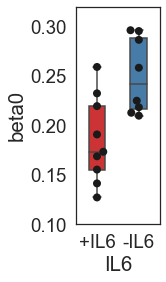

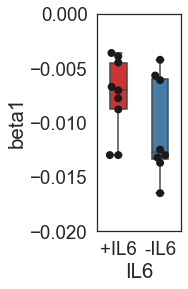

In [24]:
plt.figure(figsize=(1.5,4))
sns.set(font_scale=1.7) 

sns.set_style("white")
sns.boxplot(x="IL6", y="beta0", data=betadf, palette='Set1',width=0.4)
sns.swarmplot("IL6", y="beta0", data=betadf, color='k',size=8)
plt.ylim(0.1,0.32)
plt.savefig('beta0.pdf')
plt.figure(figsize=(1.5,4))
sns.set(font_scale=1.7) 
sns.set_style("white")
sns.boxplot(x="IL6", y="beta1", data=betadf, palette='Set1',width=0.4)
sns.swarmplot("IL6", y="beta1", data=betadf, color='k',size=8)
plt.ylim(-0.02,0)
plt.savefig('beta1.pdf')


In [25]:
# dfsns=pd.read_csv('beta_sns.csv')
dfsns_=pd.read_csv('beta_sns_noneg.csv')


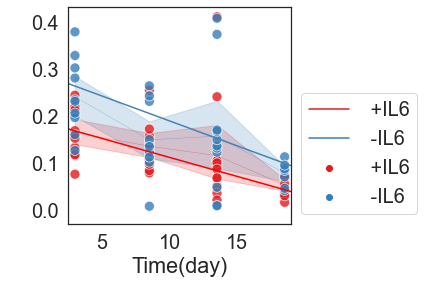

In [28]:
# plt.figure(figsize=(4,4))
sns.set(font_scale=1.8) 
sns.set_style("white")
plt.figure(figsize=(4,4))

plt.plot(X,b0_IL6+b1_IL6*X,color='red') 
plt.plot(X,b0_no+b1_no*X,color='steelblue')
ax = sns.lineplot(x='time',y='beta',hue="IL6",data=dfsns_,palette='Set1',ci=95,dashes=True,lw=0.2)

ax = sns.scatterplot(x='time',y='beta',hue="IL6",data=dfsns_,palette='Set1',s=100,alpha=0.8)
plt.xlim(2.5,19)
plt.xlabel("Time(day)")
plt.ylabel(" ")
plt.legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 0.5))
# plt.ylim(0.0,0.03)
#plt.yscale('log')
# plt.legend().set_visible(False)
plt.show()